<a href="https://colab.research.google.com/github/JerryCG/World_Happiness_Analysis/blob/main/World_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Key Variables*



*   **Life Ladder**: ranging from 0 (worst life) to 10 (best life)
*   **Log GDP per capita**: natural log GDP per capita
*   **Social support**:  the national average of the binary responses (0=no, 1=yes) to the Gallup World Poll (GWP) question, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
*   **Healthy life expectancy at birth**: the life expectancy that someone is in heathy conditions
*   **Freedom to make life choices**: the national average of binary responses to the GWP question (0=no, 1=yes), “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” 
*   **Generosity**: the residual of regressing the national average of GWP responses to the question, “Have you donated money to a charity in the past month?” on GDP per capita. 
*   **Perceptions of corruption**: the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure. 
*   **Positive affect**: the average of previous-day affect measures for happiness, laughter, and enjoyment.
*   **Negative affect**:  the average of previous-day affect measures for worry, sadness, and anger in all years.









# *1. Import and Preprocess Data*

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/Python/World_Happiness'
os.chdir(file_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd

In [3]:
ls

'Integer Life Ladder Counts by year.png'
'World Happiness from 2010 to 2020 by Region.png'
 World_Happiness.ipynb
 world-happiness-report-2021.csv
 world-happiness-report.csv
'World Life Ladder Mean by year.png'


In [4]:
df_wh = pd.read_csv('world-happiness-report.csv')

In [5]:
df_wh.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
df_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [7]:
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Asign Ranks to 2021 Data

In [8]:
df_2021['Ladder score - Rank'] = df_2021['Ladder score'].rank(ascending=False)
df_2021['Logged GDP per capita - Rank'] = df_2021['Logged GDP per capita'].rank(ascending=False)
df_2021['Social support - Rank'] = df_2021['Social support'].rank(ascending=False)
df_2021['Healthy life expectancy - Rank'] = df_2021['Healthy life expectancy'].rank(ascending=False)
df_2021['Freedom to make life choices - Rank'] = df_2021['Freedom to make life choices'].rank(ascending=False)
df_2021['Generosity - Rank'] = df_2021['Generosity'].rank(ascending=False)
df_2021['Least corruption - Rank'] = df_2021['Perceptions of corruption'].rank(ascending=True)


Assignment Regional Indicator to Countries

In [9]:
region = []

In [10]:
for i in range(len(df_wh.index)):
  for j in range(len(df_2021.index)):
    if df_wh.iloc[i, 0] == df_2021.iloc[j, 0]:
      region.append(df_2021.iloc[j, 1])
      break
    else:
      if j == len(df_2021.index) - 1:
        region.append(np.nan)

In [11]:
df_wh['Regional Indicator'] = region

In [12]:
df_wh[df_wh['Regional Indicator'].isnull() == True]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional Indicator
33,Angola,2011,5.589,8.946,0.723,52.50,0.584,0.055,0.911,0.659,0.361,NaN
34,Angola,2012,4.360,8.992,0.753,53.20,0.456,-0.136,0.906,0.558,0.305,NaN
35,Angola,2013,3.937,9.005,0.722,53.90,0.410,-0.104,0.816,0.658,0.371,NaN
36,Angola,2014,3.795,9.017,0.755,54.60,0.375,-0.168,0.834,0.579,0.368,NaN
161,Belize,2007,6.451,8.892,0.872,61.60,0.705,0.033,0.769,0.759,0.251,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1736,Trinidad and Tobago,2006,5.832,10.224,0.887,61.76,0.840,0.141,0.917,0.798,0.229,NaN
1737,Trinidad and Tobago,2008,6.696,10.295,0.858,62.08,0.838,0.087,0.959,0.817,0.184,NaN
1738,Trinidad and Tobago,2011,6.519,10.263,0.863,62.54,0.775,0.078,0.900,0.906,0.134,NaN
1739,Trinidad and Tobago,2013,6.168,10.285,0.883,62.82,0.847,0.128,0.948,0.833,0.286,NaN


In [13]:
df_wh[df_wh['Regional Indicator'].isnull() == True]['Country name'].unique()

array(['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
       'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
       'Syria', 'Trinidad and Tobago'], dtype=object)

In [14]:
df_wh['Integer Life Ladder'] = round(df_wh['Life Ladder'], 0)

In [15]:
df_wh.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional Indicator,Integer Life Ladder
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia,4.0
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia,4.0
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia,5.0
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia,4.0
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia,4.0


In [16]:
df_wh.replace('', np.nan, inplace=True)

In [17]:
df_wh.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
Regional Indicator                   object
Integer Life Ladder                 float64
dtype: object

# *2. Regression Analysis and Plot*

### a. Regress Life Ladder on Log GDP per capita

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
import seaborn as sns

Drop NAN records

In [20]:
df_wh_new1 = df_wh.dropna(axis=0, subset=['Log GDP per capita'])

In [21]:
lm1 = LinearRegression()
Z1 = df_wh_new1[['Log GDP per capita']]
target1 = df_wh_new1['Life Ladder']
lm1.fit(Z1, target1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm1.intercept_

-1.6914669344545628

In [23]:
lm1.coef_

array([0.7648624])

Life Ladder = -1.6914669344545628 + 0.7648624 * Log GDP per capita

In [24]:
df_wh_new1[['Life Ladder', 'Log GDP per capita']].corr()

,Life Ladder,Log GDP per capita
Life Ladder,1.000000,0.790166
Log GDP per capita,0.790166,1.000000


In [25]:
print('The R-square is: ', lm1.score(Z1, target1)) #relatively good prediction performance

The R-square is:  0.6243624468511177


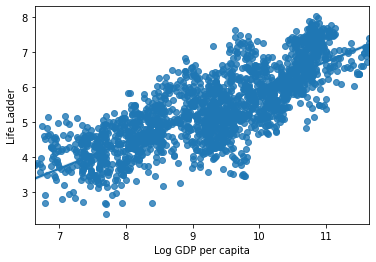

In [26]:
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df_wh_new1)

### b. Regress Life Ladder on Postive Affect

In [27]:
df_wh_new2 = df_wh.dropna(axis=0, subset=['Positive affect'])

In [28]:
lm2 = LinearRegression()
Z2 = df_wh_new2[['Positive affect']]
target2 = df_wh_new2['Life Ladder']
lm2.fit(Z2, target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm2.intercept_

1.5216397348026671

In [30]:
lm2.coef_

array([5.55751689])

Life Ladder = 1.5216397348026671 + 5.55751689 * Positive Affect

In [31]:
df_wh_new2[['Life Ladder', 'Positive affect']].corr()

,Life Ladder,Positive affect
Life Ladder,1.000000,0.532273
Positive affect,0.532273,1.000000


In [32]:
print('The R-square is: ', lm2.score(Z2, target2)) #bad performance

The R-square is:  0.28331471793117213


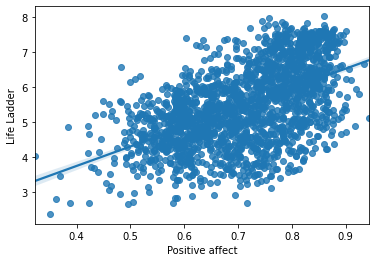

In [33]:
sns.regplot(x='Positive affect', y='Life Ladder', data=df_wh_new2)

### c. Regress Life Ladder on the other 6 key variables (Normalized)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
df_wh_new3 = df_wh.dropna(axis=0)

In [37]:
df_wh_new3.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Regional Indicator                  0
Integer Life Ladder                 0
dtype: int64

In [38]:
df_wh.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Regional Indicator', 'Integer Life Ladder'],
      dtype='object')

In [39]:
Z3 = scaler.fit_transform(df_wh_new3[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

In [40]:
lm3 = LinearRegression()
target3 = df_wh_new3['Life Ladder']
lm3.fit(Z3, target3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm3.coef_

array([ 1.80770059,  1.61341333,  1.35359394,  0.70597692,  0.75365235,
       -0.65327901])

In [42]:
print('The R-square is: ', lm3.score(Z3, target3)) #satisfactory performance: 6 key variables are meaningful

The R-square is:  0.7528196780181623


## d. Regress Life Ladder on the other 6 key variables (Original)

In [43]:
df_wh_new4 = df_wh_new3

In [44]:
Z4 = df_wh_new4[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [45]:
target4 = df_wh_new4['Life Ladder']

In [46]:
lm4 = LinearRegression()
lm4.fit(Z4, target4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm4.coef_

array([ 0.36060255,  2.3181226 ,  0.03021415,  0.97108242,  0.73598863,
       -0.68911288])

In [48]:
print('The R-square is: ', lm4.score(Z4, target4)) #same R-square as the normalized case

The R-square is:  0.7528196780181622


Try to evaluate this regression model using 2021 data

In [49]:
df_2021_trim = df_2021[['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [50]:
df_2021_trim.isnull().sum()

Country name                    0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [51]:
true_score_2021 = df_2021_trim['Ladder score']

In [52]:
predicted_score_2021 = lm4.predict(df_2021_trim.iloc[:, 2:8])

In [53]:
true_score_2021

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

In [54]:
predicted_score_2021

array([7.08865919, 7.26290138, 7.24502991, 7.08335455, 7.19076275,
       7.32155535, 7.1930149 , 7.1830947 , 7.18218812, 6.9887498 ,
       7.09993331, 6.58670296, 6.84042679, 7.02530405, 7.2278289 ,
       6.13725845, 7.00096984, 6.31811266, 6.66712543, 6.48203986,
       6.67096787, 6.50644098, 6.83179819, 6.4126519 , 6.63681221,
       6.31738085, 6.49040999, 6.20980198, 6.53845578, 5.52459355,
       6.31663209, 7.51419573, 5.68743557, 6.11950832, 5.81289671,
       5.82742561, 5.63420441, 6.13217027, 6.14892056, 6.57610247,
       6.14348297, 6.19689792, 6.0024025 , 6.21518429, 6.20616815,
       5.78018757, 6.22934395, 5.90219734, 5.43984129, 6.07560392,
       6.0146915 , 5.69321803, 6.0632871 , 6.17857798, 5.61942799,
       6.38310284, 5.94916284, 6.15940102, 5.4635627 , 6.05862925,
       5.47292134, 6.11128229, 5.5672642 , 5.75465873, 5.58329165,
       5.58067399, 5.55956335, 5.68906476, 5.38026827, 5.723517  ,
       5.82665079, 5.84696713, 5.84942193, 6.3918197 , 5.82594

In [55]:
df_2021_trim['Predicted Ladder Score'] = predicted_score_2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_2021_trim.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Predicted Ladder Score
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,7.088659
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,7.262901
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,7.245030
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,7.083355
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,7.190763


In [57]:
country = df_2021_trim['Country name']

In [58]:
y = df_2021_trim['Ladder score']
y_hat = df_2021_trim['Predicted Ladder Score']

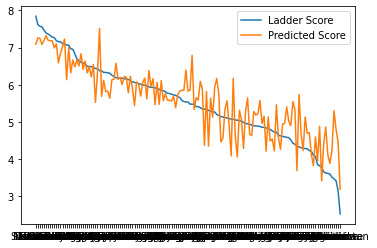

In [59]:
plt.plot(country, y, label='Ladder Score')
plt.plot(country, y_hat, label='Predicted Score')
plt.legend()
plt.show() #the prediction performance seems not so reliable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



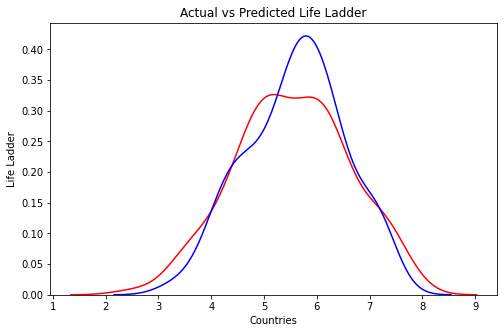

No handles with labels found to put in legend.


In [60]:
plt.figure(figsize=(8, 5))


ax1 = sns.distplot(y, hist=False, color="r", label="Actual Life Ladder")
sns.distplot(y_hat, hist=False, color="b", label="Predicted Life Ladder" , ax=ax1)

plt.title('Actual vs Predicted Life Ladder')
plt.xlabel('Countries')
plt.ylabel('Life Ladder')

plt.show()
plt.legend()
plt.close()

## e. Regress Life Ladder on the affects

In [61]:
df_wh.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
Regional Indicator                   63
Integer Life Ladder                   0
dtype: int64

In [62]:
df_wh_new5 = df_wh.dropna(axis=0, subset=['Positive affect', 'Negative affect'])

In [63]:
df_wh_new5.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  36
Social support                       2
Healthy life expectancy at birth    54
Freedom to make life choices        24
Generosity                          81
Perceptions of corruption           98
Positive affect                      0
Negative affect                      0
Regional Indicator                  59
Integer Life Ladder                  0
dtype: int64

In [64]:
lm5 = LinearRegression()
Z5 = df_wh_new5[['Positive affect', 'Negative affect']]
target5 = df_wh_new5['Life Ladder']
lm5.fit(Z5, target5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lm5.coef_

array([ 5.11873118, -1.50463823])

In [66]:
lm5.intercept_

2.23769293476411

In [67]:
print('The R-square is', lm5.score(Z5, target5),'.') #bad performance

The R-square is 0.2951267123430118 .


## f. Polynomial Regression (3rd order): Life Ladder on Log GDP per capita

In [68]:
#plot function
def PlotPolly(model, independent_variable, dependent_variabble):
    x_new = np.linspace(2, 9, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit (3rd order) Life Ladder on Log GDP per Capita')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('Log GDP per capita')
    plt.ylabel('Life Ladder')

    plt.show()
    plt.close()

In [69]:
x = df_wh_new1['Life Ladder']
y = df_wh_new1['Log GDP per capita']

In [70]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

          3          2
-0.05348 x + 0.8366 x - 3.38 x + 11.63


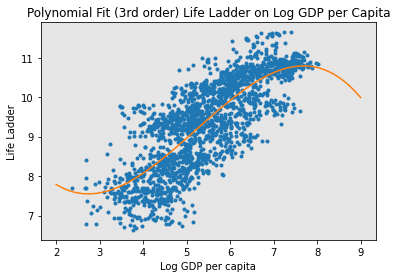

In [71]:
PlotPolly(p, x, y) #seems good but a bit overfitting

## g. Multivariate Polynomial (2nd order): Life Ladder on 6 key variables

In [72]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [73]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [74]:
Z7 = pr.fit_transform(Z4)

In [75]:
lm7 = LinearRegression()
target7 = target4
lm7.fit(Z7, target7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lm7.intercept_

-12436119918.088177

In [77]:
lm7.coef_

array([ 1.24361199e+10,  8.94283093e-01, -7.63348979e+00, -1.62503855e-01,
        2.21153218e+00,  8.63932062e-01,  4.40766677e+00, -8.76650762e-02,
        7.91258439e-01,  8.96256948e-03, -6.35477042e-02,  3.27479592e-01,
       -2.00238154e-01, -2.12980921e+00,  2.60263415e-02,  6.80970216e+00,
       -2.55479597e-01,  1.03429217e-01,  9.60859663e-04, -4.37961838e-02,
       -2.32129524e-02,  1.77542061e-02, -1.51349657e+00, -3.09806015e+00,
       -1.71471778e+00, -3.78850887e-01,  9.19734398e-01, -2.37614764e+00])

In [78]:
print('The R-square is: ', lm7.score(Z7, target7)) #better than the previous first order regression

The R-square is:  0.7834982510495557


## h. Healthy Life Expectancy and Log GDP per capita

In [79]:
df_wh_new8 = df_wh[(df_wh['Log GDP per capita'].isnull() == False) & (df_wh['Healthy life expectancy at birth'].isnull() == False) & (df_wh['Regional Indicator'].isnull() == False)]

In [80]:
fig = px.scatter(df_wh_new8, x='Log GDP per capita', y='Healthy life expectancy at birth', color='Regional Indicator', hover_data=['Country name', 'year'])
fig.show()

In [81]:
df_wh_new8[['Healthy life expectancy at birth', 'Log GDP per capita']].corr()

,Healthy life expectancy at birth,Log GDP per capita
Healthy life expectancy at birth,1.00000,0.84745
Log GDP per capita,0.84745,1.00000


**A surprising discovery: for US, the healthy life expectancy is *negatively* related to log GDP per capita.**

Polynomial Regression (3rd order): Healthy Life Expectancy on Log GDP per capita

In [82]:
#plot function
def PlotPolly(model, independent_variable, dependent_variabble):
    x_new = np.linspace(5, 15, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit (3rd order) Healthy Life Expectancy on Log GDP per Capita')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('Log GDP per capita')
    plt.ylabel('Healthy Life Expectancy')

    plt.show()
    plt.close()

In [83]:
x = df_wh_new8['Log GDP per capita']
y = df_wh_new8['Healthy life expectancy at birth']

In [84]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3         2
-0.1087 x + 2.641 x - 15.18 x + 63.85


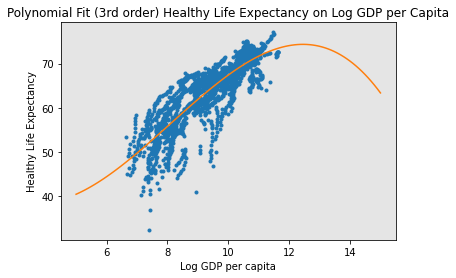

In [85]:
PlotPolly(p, x, y) 

## i. Healthy Life Expectancy and Postive Affect

In [86]:
df_wh_new9 = df_wh[(df_wh['Positive affect'].isnull() == False) & (df_wh['Healthy life expectancy at birth'].isnull() == False) & (df_wh['Regional Indicator'].isnull() == False)]

In [87]:
fig = px.scatter(df_wh_new9, x='Positive affect', y='Healthy life expectancy at birth', color='Regional Indicator', hover_data=['Country name', 'year'])
fig.show()

**Healthy life expectancy is not strongly related to positive affect.**

## j. Healthy Life Expectancy and Life Ladder

In [88]:
df_wh_new10 = df_wh[(df_wh['Life Ladder'].isnull() == False) & (df_wh['Healthy life expectancy at birth'].isnull() == False) & (df_wh['Regional Indicator'].isnull() == False)]

In [89]:
fig = px.scatter(df_wh_new10, x='Life Ladder', y='Healthy life expectancy at birth', color='Regional Indicator', hover_data=['Country name', 'year'])
fig.show()

In [90]:
df_wh_new10[['Life Ladder', 'Healthy life expectancy at birth']].corr()

,Life Ladder,Healthy life expectancy at birth
Life Ladder,1.000000,0.743763
Healthy life expectancy at birth,0.743763,1.000000


## k. Positive affect and Log GDP per capita

In [91]:
df_wh_new11 = df_wh[(df_wh['Positive affect'].isnull() == False) & (df_wh['Log GDP per capita'].isnull() == False) & (df_wh['Regional Indicator'].isnull() == False)]

In [92]:
fig = px.scatter(df_wh_new11, x='Log GDP per capita', y='Positive affect', color='Regional Indicator', hover_data=['Country name', 'year'])
fig.show()

**Not strongly related**

## l. Social Support and Perception of Corruption

In [93]:
df_wh_new12 = df_wh[(df_wh['Social support'].isnull() == False) & (df_wh['Perceptions of corruption'].isnull() == False) & (df_wh['Regional Indicator'].isnull() == False)]

In [94]:
fig = px.scatter(df_wh_new12, x='Social support', y='Perceptions of corruption', color='Regional Indicator', hover_data=['Country name', 'year'])
fig.show()

# *3. China*

## a. China's Life Ladder

In [95]:
df_china = df_wh[df_wh['Country name'] == 'China']

In [96]:
fig = px.bar(df_china, x='year', y='Life Ladder',
            color='Life Ladder',
            width=800, height=500, title='China Life Ladder from 2006 to 2020')
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, tickvals=list(range(2006, 2021)))
fig.show()

## b. China's healthy life expectancy

In [97]:
fig = px.bar(df_china, x='year', y='Healthy life expectancy at birth',
            color='Healthy life expectancy at birth',
            width=900, height=500, title='China Healthy Life Expectancy from 2006 to 2020')
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, tickvals=list(range(2006, 2021)))
fig.show()

## c. China's Affect Visualization

In [98]:
fig = go.Figure(data=[
    go.Bar(name='Positive Affect', x=df_china['year'], y=df_china['Positive affect'], marker_color='orange'),
    go.Bar(name='Negative Affect', x=df_china['year'], y=df_china['Negative affect'], marker_color='blue')
])
# Change the bar mode
fig.update_layout(barmode='group', title='China Affect from 2006 to 2020')
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, tickvals=list(range(2006, 2021)))
fig.show()

# *4. Asia*

## a. 2021 Life Ladder Plots by Asian country

In [99]:
import plotly.express as px

In [100]:
df_2021_asia = df_2021[df_2021['Regional indicator'].str.contains('asia', case=False)]

Bar Chart

In [101]:
fig = px.bar(df_2021_asia, x='Country name', y='Ladder score', width=800, title='2021 Life Ladder by Asian country', color='Regional indicator')
fig.show()

Polar Chart

In [102]:
fig = px.bar_polar(df_2021_asia, theta='Country name', r='Ladder score', width=800, title='2021 Life Ladder by Asian country', 
                   color='Regional indicator', template="plotly_dark")
fig.show()

## b. 2021 Means by Asian regions

In [103]:
df_2021_asia_region = df_2021_asia.groupby(['Regional indicator'], axis=0).mean() #groupby creates dataframe

In [104]:
df_2021_asia_region

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Ladder score - Rank,Logged GDP per capita - Rank,Social support - Rank,Healthy life expectancy - Rank,Freedom to make life choices - Rank,Generosity - Rank,Least corruption - Rank
Regional indicator,,,,,,,,,,,,,,,,,,,,,,,,,
East Asia,5.810333,0.040000,5.889500,5.731667,10.367667,0.860500,71.252167,0.7635,-0.062333,0.683333,2.43,1.304000,0.896667,0.717333,0.464667,0.147333,0.163000,2.117833,62.083333,38.000000,62.333333,31.416667,91.000000,85.500000,55.250000
South Asia,4.441857,0.055143,4.549286,4.334143,8.682571,0.703429,62.681000,0.7650,0.042714,0.797429,2.43,0.715286,0.542286,0.447286,0.466429,0.215857,0.090571,1.964000,114.142857,104.714286,109.642857,93.428571,75.285714,49.928571,86.357143
Southeast Asia,5.407556,0.050000,5.505556,5.309444,9.421444,0.820333,64.888444,0.9090,0.156333,0.709111,2.43,0.973556,0.805667,0.516889,0.641444,0.289889,0.146667,2.033444,81.000000,81.000000,81.555556,80.333333,24.222222,40.944444,76.000000


# *5. World-wide*

## a. Plot the average score by region

In [105]:
df_wh_region = df_wh[df_wh['Regional Indicator'].isnull() == False]

In [106]:
df_wh_region.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   24
Social support                        9
Healthy life expectancy at birth     51
Freedom to make life choices         30
Generosity                           76
Perceptions of corruption           104
Positive affect                      18
Negative affect                      13
Regional Indicator                    0
Integer Life Ladder                   0
dtype: int64

Calculate the region means.

In [107]:
df_region_mean = df_wh_region.groupby(['Regional Indicator', 'year'], as_index=False).mean()

In [108]:
df_region_mean.head()

,Regional Indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Integer Life Ladder
0,Central and Eastern Europe,2005,5.567250,10.001250,0.902250,65.475000,0.786000,NaN,0.936000,0.688750,0.294000,5.500000
1,Central and Eastern Europe,2006,5.422200,10.153200,0.922800,65.032000,0.687000,-0.159000,0.871000,0.652000,0.263600,5.400000
2,Central and Eastern Europe,2007,5.152267,9.797400,0.854467,65.421071,0.578733,-0.097467,0.901667,0.635200,0.266067,5.133333
3,Central and Eastern Europe,2008,5.418250,9.897500,0.889250,64.493333,0.631000,-0.147250,0.849750,0.589667,0.256750,5.500000
4,Central and Eastern Europe,2009,5.180000,9.790929,0.838714,66.036077,0.546429,-0.111071,0.906429,0.598714,0.295786,5.071429


In [109]:
region_list = df_region_mean['Regional Indicator'].unique()

In [110]:
year = range(2010, 2021)

In [111]:
y = []
for item in region_list:
  y.append(df_region_mean[(df_region_mean['Regional Indicator'] == item)  & (df_region_mean['year'] > 2009)])

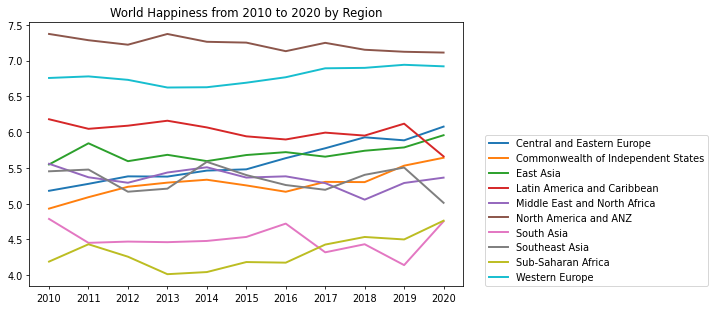

In [112]:
i = 0
plt.figure(figsize=(8,5), dpi=70)
for item in region_list:
  plt.plot(year, y[i]['Life Ladder'], label=item, linewidth=2)
  i+=1

plt.title('World Happiness from 2010 to 2020 by Region')
plt.legend(loc=(1.05,0))
plt.savefig('World Happiness from 2010 to 2020 by Region.png', bbox_inches = 'tight')
plt.xticks(ticks=(range(2010, 2021)))
plt.show()


In [113]:
region_list

array(['Central and Eastern Europe', 'Commonwealth of Independent States',
       'East Asia', 'Latin America and Caribbean',
       'Middle East and North Africa', 'North America and ANZ',
       'South Asia', 'Southeast Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

In [114]:
fig = go.Figure(data=[
      go.Bar(name='Central and Eastern Europe', x=df_region_mean[df_region_mean['Regional Indicator'] == 'Central and Eastern Europe']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'Central and Eastern Europe']['Life Ladder']),
      go.Bar(name='Western Europe', x=df_region_mean[df_region_mean['Regional Indicator'] == 'Western Europe']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'Western Europe']['Life Ladder']),
      go.Bar(name='South Asia', x=df_region_mean[df_region_mean['Regional Indicator'] == 'South Asia']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'South Asia']['Life Ladder']),
      go.Bar(name='East Asia', x=df_region_mean[df_region_mean['Regional Indicator'] == 'East Asia']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'East Asia']['Life Ladder']),
      go.Bar(name='Southeast Asia', x=df_region_mean[df_region_mean['Regional Indicator'] == 'Southeast Asia']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'Southeast Asia']['Life Ladder']),
      go.Bar(name='Commonwealth of Independent States', x=df_region_mean[df_region_mean['Regional Indicator'] == 'Commonwealth of Independent States']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'Commonwealth of Independent States']['Life Ladder']),
      go.Bar(name='Latin America and Caribbean', x=df_region_mean[df_region_mean['Regional Indicator'] == 'Latin America and Caribbean']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'Latin America and Caribbean']['Life Ladder']),
      go.Bar(name='North America and ANZ', x=df_region_mean[df_region_mean['Regional Indicator'] == 'North America and ANZ']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'North America and ANZ']['Life Ladder']),
      go.Bar(name='Middle East and North Africa', x=df_region_mean[df_region_mean['Regional Indicator'] == 'Middle East and North Africa']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'Middle East and North Africa']['Life Ladder']),
      go.Bar(name='Sub-Saharan Africa', x=df_region_mean[df_region_mean['Regional Indicator'] == 'Sub-Saharan Africa']['year'], y=df_region_mean[df_region_mean['Regional Indicator'] == 'Sub-Saharan Africa']['Life Ladder']),
])
# Change the bar mode
fig.update_layout(barmode='group', title='Average Life Ladder by region', width=2000)
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, tickvals=list(range(2005, 2021)))
fig.show()

## b. Plot the ladder with country counts

In [115]:
Year = range(2005, 2021)

In [116]:
columns = ['Year', 'Ladder 0', 'Ladder 1', 'Ladder 2', 'Ladder 3', 'Ladder 4', 'Ladder 5', 'Ladder 6', 'Ladder 7', 'Ladder 8', 'Ladder 9', 'Ladder 10']
df_counts = pd.DataFrame(columns=columns)


In [117]:
for item in Year:
  ls = []
  ls.append(item)
  df_temp = df_wh[df_wh['year'] == item]['Integer Life Ladder'].value_counts().to_frame()
  for i in range(11):
    if i not in df_temp.index:
      ls.append(0)
    else:
      ls.append(df_temp.loc[i]['Integer Life Ladder']) #i here is the index possible value, where index is the integer life ladder.
  df_counts.loc[len(df_counts.index)] = ls #append row records

In [118]:
df_counts

,Year,Ladder 0,Ladder 1,Ladder 2,Ladder 3,Ladder 4,Ladder 5,Ladder 6,Ladder 7,Ladder 8,Ladder 9,Ladder 10
0,2005,0,0,0,0,0,7,4,15,1,0,0
1,2006,0,0,0,3,20,35,19,11,1,0,0
2,2007,0,0,0,1,19,40,24,15,3,0,0
3,2008,0,0,0,3,21,43,17,20,6,0,0
4,2009,0,0,0,2,22,43,27,17,3,0,0
5,2010,0,0,0,1,27,36,33,24,3,0,0
6,2011,0,0,0,1,28,58,25,32,2,0,0
7,2012,0,0,0,3,28,47,37,22,5,0,0
8,2013,0,0,0,4,30,41,33,26,3,0,0
9,2014,0,0,0,8,29,40,40,27,1,0,0


In [119]:
df_counts.dtypes

Year         object
Ladder 0     object
Ladder 1     object
Ladder 2     object
Ladder 3     object
Ladder 4     object
Ladder 5     object
Ladder 6     object
Ladder 7     object
Ladder 8     object
Ladder 9     object
Ladder 10    object
dtype: object

In [120]:
df_counts = df_counts.astype('int')

In [121]:
df_counts.dtypes

Year         int64
Ladder 0     int64
Ladder 1     int64
Ladder 2     int64
Ladder 3     int64
Ladder 4     int64
Ladder 5     int64
Ladder 6     int64
Ladder 7     int64
Ladder 8     int64
Ladder 9     int64
Ladder 10    int64
dtype: object

In [122]:
df_counts.columns

Index(['Year', 'Ladder 0', 'Ladder 1', 'Ladder 2', 'Ladder 3', 'Ladder 4',
       'Ladder 5', 'Ladder 6', 'Ladder 7', 'Ladder 8', 'Ladder 9',
       'Ladder 10'],
      dtype='object')

In [123]:
df_counts.set_index('Year', inplace=True)

In [124]:
#df_counts = df_counts.transpose()

In [125]:
fig = go.Figure(data=[
      go.Bar(name='2005', x=list(df_counts.columns)[1:], y=df_counts.loc[2005]),
      go.Bar(name='2006', x=list(df_counts.columns)[1:], y=df_counts.loc[2006]),
      go.Bar(name='2007', x=list(df_counts.columns)[1:], y=df_counts.loc[2007]),
      go.Bar(name='2008', x=list(df_counts.columns)[1:], y=df_counts.loc[2008]),
      go.Bar(name='2009', x=list(df_counts.columns)[1:], y=df_counts.loc[2009]),
      go.Bar(name='2010', x=list(df_counts.columns)[1:], y=df_counts.loc[2010]),
      go.Bar(name='2011', x=list(df_counts.columns)[1:], y=df_counts.loc[2011]),
      go.Bar(name='2012', x=list(df_counts.columns)[1:], y=df_counts.loc[2012]),
      go.Bar(name='2013', x=list(df_counts.columns)[1:], y=df_counts.loc[2013]),
      go.Bar(name='2014', x=list(df_counts.columns)[1:], y=df_counts.loc[2014]),
      go.Bar(name='2015', x=list(df_counts.columns)[1:], y=df_counts.loc[2015]),
      go.Bar(name='2016', x=list(df_counts.columns)[1:], y=df_counts.loc[2016]),
      go.Bar(name='2017', x=list(df_counts.columns)[1:], y=df_counts.loc[2017]),
      go.Bar(name='2018', x=list(df_counts.columns)[1:], y=df_counts.loc[2018]),
      go.Bar(name='2019', x=list(df_counts.columns)[1:], y=df_counts.loc[2019]),
      go.Bar(name='2020', x=list(df_counts.columns)[1:], y=df_counts.loc[2020]),

])
# Change the bar mode
fig.update_layout(barmode='group', title='Life Ladder Distribution by year', width=1000)
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, tickvals=list(df_counts.columns)[1:])
fig.show()

## c. Plot the yearly mean of Life Ladder

In [126]:
df_yearly_mean = df_wh.groupby(['year'], as_index=False).mean()

In [127]:
df_yearly_mean.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Integer Life Ladder
0,2005,6.446259,10.118667,0.897407,67.007407,0.829520,0.256000,0.715880,0.748615,0.255769,6.370370
1,2006,5.196899,9.044284,0.835809,60.147500,0.730477,0.006654,0.755747,0.719090,0.254614,5.202247
2,2007,5.418275,9.172951,0.807770,61.305267,0.687337,0.014833,0.792133,0.709178,0.250216,5.411765
3,2008,5.418509,9.167273,0.784391,61.249954,0.688355,0.021486,0.764121,0.706241,0.243545,5.436364
4,2009,5.457667,9.263805,0.819071,62.418928,0.687402,-0.005372,0.763387,0.706097,0.246982,5.385965


In [128]:
fig = px.bar(df_yearly_mean, x='year', y='Life Ladder', title='World Life Ladder Mean by year', color='Life Ladder')
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, tickvals=list(range(2005, 2021)))
fig.show()

## d. Life Ladder 2021 by country

In [129]:
fig = px.bar(df_2021, x="Country name", y="Ladder score", title='Life Ladder 2021 by country', width=2500)
fig.show()

## e. 2021 World Top&Bottom10

In [130]:
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Ladder score - Rank',
       'Logged GDP per capita - Rank', 'Social support - Rank',
       'Healthy life expectancy - Rank', 'Freedom to make life choices - Rank',
       'Generosity - Rank', 'Least corruption - Rank'],
      dtype='object')

### *Life Ladder*

In [131]:
df_2021_top10_ladder = df_2021.nlargest(10, 'Ladder score')

In [132]:
fig = px.bar(df_2021_top10_ladder, x='Country name', y='Ladder score', 
             title='2021 World Top 10 Life Ladder Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 10), 
             category_orders=dict(df_2021_top10_ladder[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

In [133]:
df_2021_bottom10_ladder = df_2021.nsmallest(10, 'Ladder score')

In [134]:
fig = px.bar(df_2021_bottom10_ladder, x='Country name', y='Ladder score', 
             title='2021 World Bottom 10 Life Ladder Countries', hover_data=['Regional indicator'], 
             color='Regional indicator', range_y=(0,10), 
             category_orders=dict(df_2021_bottom10_ladder[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

### *Log GDP per capita*

In [135]:
df_2021_top10_GDP = df_2021.nlargest(10, 'Logged GDP per capita')

In [136]:
fig = px.bar(df_2021_top10_GDP, x='Country name', y='Logged GDP per capita', 
             title='2021 World Top 10 GDP per capita Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 15), 
             category_orders=dict(df_2021_top10_GDP[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

In [137]:
df_2021_bottom10_GDP = df_2021.nsmallest(10, 'Logged GDP per capita')

In [138]:
fig = px.bar(df_2021_bottom10_GDP, x='Country name', y='Logged GDP per capita', 
             title='2021 World Bottom 10 GDP per capita Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 15), 
             category_orders=dict(df_2021_bottom10_GDP[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

### *Social support*

In [139]:
df_2021_top10_ss = df_2021.nlargest(10, 'Social support')

In [140]:
fig = px.bar(df_2021_top10_ss, x='Country name', y='Social support', 
             title='2021 World Top 10 Social support Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 1), 
             category_orders=dict(df_2021_top10_ss[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

In [141]:
df_2021_bottom10_ss = df_2021.nsmallest(10, 'Social support')

In [142]:
fig = px.bar(df_2021_bottom10_ss, x='Country name', y='Social support', 
             title='2021 World Bottom 10 Social support Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 1), 
             category_orders=dict(df_2021_bottom10_ss[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

### *Healthy life expectancy at birth*

In [143]:
df_2021_top10_hle = df_2021.nlargest(10, 'Healthy life expectancy')

In [144]:
fig = px.bar(df_2021_top10_hle, x='Country name', y='Healthy life expectancy', 
             title='2021 World Top 10 Healthy life expectancy Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 90), 
             category_orders=dict(df_2021_top10_hle[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

In [145]:
df_2021_bottom10_hle = df_2021.nsmallest(10, 'Healthy life expectancy')

In [146]:
fig = px.bar(df_2021_bottom10_hle, x='Country name', y='Healthy life expectancy', 
             title='2021 World Bottom 10 Healthy life expectancy Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 90), 
             category_orders=dict(df_2021_bottom10_hle[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

### *Freedom to make life choices*

In [147]:
df_2021_top10_f = df_2021.nlargest(10, 'Freedom to make life choices')

In [148]:
fig = px.bar(df_2021_top10_f, x='Country name', y='Freedom to make life choices', 
             title='2021 World Top 10 Freedom to make life choices Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 1), 
             category_orders=dict(df_2021_top10_f[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

In [149]:
df_2021_bottom10_f = df_2021.nsmallest(10, 'Freedom to make life choices')

In [150]:
fig = px.bar(df_2021_bottom10_f, x='Country name', y='Freedom to make life choices', 
             title='2021 World Bottom 10 Freedom to make life choices Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 1), 
             category_orders=dict(df_2021_bottom10_f[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

### *Generosity*

In [151]:
df_2021_top10_g = df_2021.nlargest(10, 'Generosity')

In [152]:
fig = px.bar(df_2021_top10_g, x='Country name', y='Generosity', 
             title='2021 World Top 10 Generosity Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 0.6), 
             category_orders=dict(df_2021_top10_g[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

In [153]:
df_2021_bottom10_g = df_2021.nsmallest(10, 'Generosity')

In [154]:
fig = px.bar(df_2021_bottom10_g, x='Country name', y='Generosity', 
             title='2021 World Bottom 10 Generosity Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(-0.6, 0), 
             category_orders=dict(df_2021_bottom10_g[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

### *Perceptions of corruption*

In [155]:
df_2021_top10_nc = df_2021.nsmallest(10, 'Perceptions of corruption')

In [156]:
fig = px.bar(df_2021_top10_nc, x='Country name', y='Perceptions of corruption', 
             title='2021 World Top 10 Least Corroption Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 1), 
             category_orders=dict(df_2021_top10_nc[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

In [157]:
df_2021_bottom10_nc = df_2021.nlargest(10, 'Perceptions of corruption')

In [158]:
fig = px.bar(df_2021_bottom10_nc, x='Country name', y='Perceptions of corruption', 
             title='2021 World Bottom 10 Heavy Corroption Countries', color='Regional indicator', 
             hover_data=['Regional indicator'], range_y=(0, 1), 
             category_orders=dict(df_2021_bottom10_nc[['Country name']]))
#fig.update_traces(marker_color='lightskyblue')
fig.show()

# *6. H2H: China vs US*

## a. 2021 Performance

In [159]:
df_2021_china_us = df_2021[(df_2021['Country name'] == 'China') | (df_2021['Country name'] == 'United States')]

In [160]:
df_2021_china_us = df_2021_china_us[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [161]:
df_2021_china_us

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,United States,North America and ANZ,6.951,11.023,0.920,68.200,0.837,0.098,0.698
83,China,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755


In [162]:
list(df_2021_china_us.columns[2:])

['Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [163]:
fig = go.Figure(data=[
    go.Bar(name='China', x=df_2021_china_us.columns[2:], y=df_2021_china_us.loc[83][2:], marker_color='red'),
    go.Bar(name='United States', x=df_2021_china_us.columns[2:], y=df_2021_china_us.loc[18][2:], marker_color='blue')
])
# Change the bar mode
fig.update_layout(barmode='group', title='2021 Happiness: China vs United States')
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10)
fig.show()

## b. 2005 - 2020 Performance

In [164]:
df_china

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional Indicator,Integer Life Ladder
342,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN,0.809,0.170,East Asia,5.0
343,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN,0.817,0.159,East Asia,5.0
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN,0.817,0.147,East Asia,5.0
345,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN,0.786,0.162,East Asia,4.0
346,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN,0.765,0.158,East Asia,5.0
347,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN,0.820,0.134,East Asia,5.0
348,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN,0.821,0.159,East Asia,5.0
349,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN,0.836,0.142,East Asia,5.0
350,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN,0.854,0.112,East Asia,5.0
351,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN,0.809,0.171,East Asia,5.0


In [165]:
df_us = df_wh[df_wh['Country name'] == 'United States']

In [166]:
df_china_us = df_china.merge(df_us, how='outer')

In [167]:
df_china_us

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional Indicator,Integer Life Ladder
0,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN,0.809,0.170,East Asia,5.0
1,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN,0.817,0.159,East Asia,5.0
2,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN,0.817,0.147,East Asia,5.0
3,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN,0.786,0.162,East Asia,4.0
4,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN,0.765,0.158,East Asia,5.0
5,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN,0.820,0.134,East Asia,5.0
6,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN,0.821,0.159,East Asia,5.0
7,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN,0.836,0.142,East Asia,5.0
8,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN,0.854,0.112,East Asia,5.0
9,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN,0.809,0.171,East Asia,5.0


### Life Ladder and Log GDP per capita scatter Plots

In [168]:
fig = px.scatter(df_china_us, x='Log GDP per capita', y='Life Ladder', color='Country name', title='Life Ladder and Log GDP per capita scatter plots')
fig.show()

In [169]:
df_china[['Life Ladder', 'Log GDP per capita']].corr()

,Life Ladder,Log GDP per capita
Life Ladder,1.000000,0.796715
Log GDP per capita,0.796715,1.000000


In [170]:
df_us[['Life Ladder', 'Log GDP per capita']].corr()

,Life Ladder,Log GDP per capita
Life Ladder,1.000000,-0.637279
Log GDP per capita,-0.637279,1.000000


***For China, the happiness index (Life Ladder) is positively correlated with GDP per capita; but for the US, the opposite is true. Therefore, the GDP per capita does not necessaryliy bring greater happiness.***

### Healthy life expectancy at birth and Log GDP per capita scatter Plots

In [171]:
fig = px.scatter(df_china_us, x='Log GDP per capita', y='Healthy life expectancy at birth', 
                 color='Country name', title='Healthy life expectancy at birth and Log GDP per capita scatter Plots')
fig.show()

In [172]:
df_china[['Healthy life expectancy at birth', 'Log GDP per capita']].corr()

,Healthy life expectancy at birth,Log GDP per capita
Healthy life expectancy at birth,1.000000,0.968679
Log GDP per capita,0.968679,1.000000


In [173]:
df_us[['Healthy life expectancy at birth', 'Log GDP per capita']].corr()

,Healthy life expectancy at birth,Log GDP per capita
Healthy life expectancy at birth,1.000000,-0.439311
Log GDP per capita,-0.439311,1.000000


***For China, the healthy life expectancy at birth is strongly correlated with the GDP per capita (also a strong linear relationship), even with increasing marginal return; but for US, the healthy life expectancy is to some degree negatively correlated with GDP per capita.***

# *7. Auto Search App*

## Function Definitions

In [174]:
def get_info(country, year):
  print('\n')
  if country not in df_wh['Country name'].unique():
    print('Please enter a valid country name from the below list!')
    print(df_wh['Country name'].unique())
  elif year not in list(df_wh[df_wh['Country name'] == country]['year']):
    print('The year entered is invalid or no data available.')
  else:
    print('*' * 3, year, country, 'Happiness Report', '*' * 3)
    print('Life Ladder (from 0 to 10): ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Life Ladder']))
    print('Log GDP per capita: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Log GDP per capita']))
    print('Social support: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Social support']))
    print('Healthy life expectancy at birth: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Healthy life expectancy at birth']))
    print('Freedom to make life choices: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Freedom to make life choices']))
    print('Generosity: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Generosity']))
    print('Perceptions of corruption: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Perceptions of corruption']))
    print('Positive affect: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Positive affect']))
    print('Negative affect: ', float(df_wh[(df_wh['Country name'] == country) & (df_wh['year'] == year)]['Negative affect']))


In [175]:
def get_rank(country):
  print('\n')
  if country not in df_2021['Country name'].unique():
    print('Please enter a valid country name from the below list!')
    print(df_2021['Country name'].unique())
  else:
    print('*' * 3, '2021', country, 'Happiness Report', '*' * 3)
    print('Life Ladder (from 0 to 10): ', float(df_2021[df_2021['Country name'] == country]['Ladder score']))
    print('Rank: ', float(df_2021[df_2021['Country name'] == country]['Ladder score - Rank']))
    print('Log GDP per capita: ', float(df_2021[df_2021['Country name'] == country]['Logged GDP per capita']))
    print('Rank: ', float(df_2021[df_2021['Country name'] == country]['Logged GDP per capita - Rank']))
    print('Social support: ', float(df_2021[df_2021['Country name'] == country]['Social support']))
    print('Rank: ', float(df_2021[df_2021['Country name'] == country]['Social support - Rank']))
    print('Healthy life expectancy at birth: ', float(df_2021[df_2021['Country name'] == country]['Healthy life expectancy']))
    print('Rank: ', float(df_2021[df_2021['Country name'] == country]['Healthy life expectancy - Rank']))
    print('Freedom to make life choices: ', float(df_2021[df_2021['Country name'] == country]['Freedom to make life choices']))
    print('Rank: ', float(df_2021[df_2021['Country name'] == country]['Freedom to make life choices - Rank']))
    print('Generosity: ', float(df_2021[df_2021['Country name'] == country]['Generosity']))
    print('Rank: ', float(df_2021[df_2021['Country name'] == country]['Generosity - Rank']))
    print('Perceptions of corruption: ', float(df_2021[df_2021['Country name'] == country]['Perceptions of corruption']))
    print('Rank(least corrption): ', float(df_2021[df_2021['Country name'] == country]['Least corruption - Rank']))


## a. 2005 - 2020 Search

In [176]:
country = input('Please enter a country name: ')
year = int(input('Please enter a year from 2005 to 2020: '))
get_info(country, year)

Please enter a country name: Japan
Please enter a year from 2005 to 2020: 2020


*** 2020 Japan Happiness Report ***
Life Ladder (from 0 to 10):  6.117999999999999
Log GDP per capita:  10.58
Social support:  0.887
Healthy life expectancy at birth:  75.2
Freedom to make life choices:  0.8059999999999999
Generosity:  -0.259
Perceptions of corruption:  0.609
Positive affect:  0.742
Negative affect:  0.18600000000000003


## b. 2021 Search and Rank

In [177]:
country = input('Please enter a country name: ')
get_rank(country)

Please enter a country name: Japan


*** 2021 Japan Happiness Report ***
Life Ladder (from 0 to 10):  5.94
Rank:  56.0
Log GDP per capita:  10.610999999999999
Rank:  29.0
Social support:  0.884
Rank:  51.0
Healthy life expectancy at birth:  75.1
Rank:  3.0
Freedom to make life choices:  0.7959999999999999
Rank:  77.0
Generosity:  -0.258
Rank:  148.0
Perceptions of corruption:  0.638
Rank(least corrption):  30.0
